# 1 - Preprocessing

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

## Access data files

In [3]:
current_dir = Path.cwd()
parent_dir = current_dir.parent

#dataset_train = pd.read_csv(parent_dir/"Overall_input.csv")
#Access input folder
input_dir1 = Path (parent_dir/"Pressure_profiles")
print ("input",input_dir1)

input H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles


In [4]:
#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

2 [WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_1'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_11'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_13'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_15'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_17'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_19'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_21'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_23'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_25'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_27'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_history/Pressure_profiles/L13_29'), WindowsPath('H:/Chamodi/Machine Learning/Pressure_hi

In [5]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if 48 < int(file_train.stem[1:]) < 60)
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_1
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_11
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_13
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_15
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_17
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_19
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_21
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_23
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_25
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L13_27
P49
P53
P57
P59
folder H:\Chamodi\Machine Learning\Pressure_history\Pressure_profiles\L

In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573430 entries, 0 to 573429
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        573430 non-null  float64
 1   Standoff_distance  573430 non-null  int64  
 2   Time               573430 non-null  float64
 3   Pressure           573430 non-null  float64
 4   Phase              573430 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 21.9+ MB


In [7]:
dataset_train = pd.get_dummies(dataset_train, columns =['Phase'])
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573430 entries, 0 to 573429
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Charge_mass        573430 non-null  float64
 1   Standoff_distance  573430 non-null  int64  
 2   Time               573430 non-null  float64
 3   Pressure           573430 non-null  float64
 4   Phase_negative     573430 non-null  uint8  
 5   Phase_positive     573430 non-null  uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 18.6 MB


In [8]:
dataset_train.head(30)

,Charge_mass,Standoff_distance,Time,Pressure,Phase_negative,Phase_positive
0,0.5,25,0.06854,101200.00781,0,1
1,0.5,25,0.06855,101200.02344,0,1
2,0.5,25,0.06856,101200.06250,0,1
3,0.5,25,0.06857,101200.14844,0,1
4,0.5,25,0.06858,101200.37500,0,1
5,0.5,25,0.06859,101200.97656,0,1
6,0.5,25,0.06860,101202.40625,0,1
7,0.5,25,0.06861,101205.86719,0,1
8,0.5,25,0.06862,101214.19531,0,1
9,0.5,25,0.06863,101235.21094,0,1


In [9]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(573430, 5) (573430,)


In [10]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Feature scaling

In [10]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_val = sc.fit_transform(X_val)
#X_test = sc.transform(X_test)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

[[-0.19230285 -0.39559388 -1.05793601  0.          1.        ]
 [-0.70358499 -0.39559388 -0.30441461  1.          0.        ]
 [ 0.52349214 -0.39559388 -0.00272976  1.          0.        ]
 ...
 [-0.70358499 -0.39559388 -1.14067154  0.          1.        ]
 [ 1.03477428 -0.39559388 -1.82315137  0.          1.        ]
 [ 0.31897929  1.16815017  0.99314633  1.          0.        ]]


In [14]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[ 0.11446643 -0.39559388 -0.77673823  1.          0.        ]
 [ 1.44379999 -0.39559388 -1.75649954  0.          1.        ]
 [ 0.93251785  0.64690215  1.49986875  1.          0.        ]
 ...
 [ 1.44379999  1.16815017 -0.47503266  1.          0.        ]
 [ 0.52349214 -1.43808991  0.22281234  1.          0.        ]
 [ 0.11446643  1.16815017  1.14545745  1.          0.        ]]


In [15]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[-1.82840569 -0.39559388  0.05877616  1.          0.        ]
 [-0.90809784  0.64690215  0.39268786  1.          0.        ]
 [ 0.42123571 -1.43808991  0.87378222  1.          0.        ]
 ...
 [-0.70358499 -1.43808991 -1.37353968  1.          0.        ]
 [ 0.11446643  0.64690215 -0.9942254   0.          1.        ]
 [-2.03291855 -1.43808991 -0.40987353  1.          0.        ]]


In [16]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 344058
X_test 114686
X_val 114686


# 2 - Model training

## Calling the XGB Regressor

In [17]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [900, 1000, 1100, 1200],
               'max_depth': [3, 4, 5, 6],
               'gamma': [5, 1, 0.1, 0.01], 
               'learning_rate' : [0.001, 0.01, 0.1, 0.2] }]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

## Training the XGB Regression model on the Training set

In [18]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
evalset = [(X_train, y_train), (X_val,y_val)]
regressor = XGBRegressor(n_estimators = 400,
                         max_depth = 20,
                         gamma = 1, 
                         learning_rate = 0.1,
                         random_state = 67,
                         eval_metric = 'mae',
                         early_stopping_rounds= 20)
regressor.fit(X_train, y_train, eval_set = evalset)

[0]	validation_0-mae:91028.69808	validation_1-mae:91026.43861
[1]	validation_0-mae:81926.29487	validation_1-mae:81925.55834
[2]	validation_0-mae:73734.13274	validation_1-mae:73735.03273
[3]	validation_0-mae:66361.20456	validation_1-mae:66363.36097
[4]	validation_0-mae:59725.48119	validation_1-mae:59728.62228
[5]	validation_0-mae:53753.41117	validation_1-mae:53757.09656
[6]	validation_0-mae:48378.70480	validation_1-mae:48382.80101
[7]	validation_0-mae:43541.36235	validation_1-mae:43546.07784
[8]	validation_0-mae:39187.80236	validation_1-mae:39192.86700
[9]	validation_0-mae:35269.55202	validation_1-mae:35274.73481
[10]	validation_0-mae:31743.05773	validation_1-mae:31748.64130
[11]	validation_0-mae:28569.20685	validation_1-mae:28574.99221
[12]	validation_0-mae:25712.73598	validation_1-mae:25718.55208
[13]	validation_0-mae:23141.93514	validation_1-mae:23147.80892
[14]	validation_0-mae:20828.10496	validation_1-mae:20834.03934
[15]	validation_0-mae:18745.63433	validation_1-mae:18751.65717
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=67, ...)

In [19]:
# retrieve performance metrics
results = regressor.evals_result()

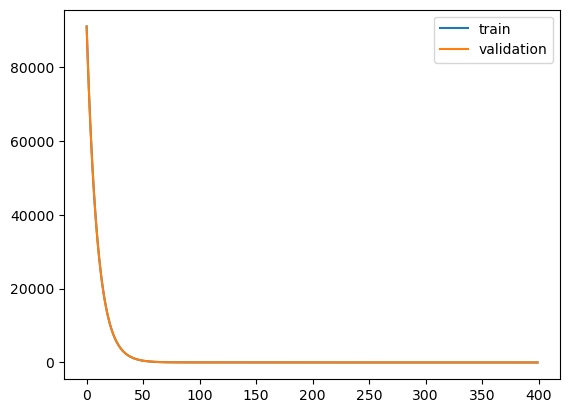

In [20]:
plt.plot(results['validation_0']['mae'], label='train')
plt.plot(results['validation_1']['mae'], label='validation')
plt.legend()

## Create a KFold object with 5 splits 

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())

KeyboardInterrupt: 

# 3 - Prediction

## Predicting the Test set results

In [21]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 98849.6875     98854.148438 ]
 [110414.203125  110432.69531  ]
 [100968.59375   100969.89844  ]
 ...
 [100975.375     100983.89844  ]
 [100343.5390625 100351.52344  ]
 [100598.5390625 100598.14844  ]]


## Print Output

In [18]:
df = pd.DataFrame(file).T
df.to_excel(excel_writer = "E:/PhD/Machine Learning/Pressure_paper1/Output_XGB.xlsx")

PermissionError: [Errno 13] Permission denied: 'E:\\PhD\\Machine Learning\\Pressure_paper1/Output.xlsx'

# 4 - Evaluation

## Evaluating the Model Performance

### R2

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9977378906047749


### Adj R2

In [23]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9977377919777521


### RMSE

In [24]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

140.04599257027544

### MAE

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

13.64842906271474

## Visualize

Text(0, 0.5, 'Predicted data')

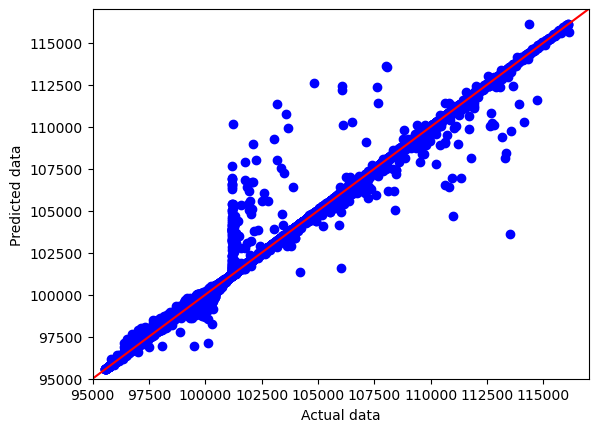

In [26]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([95000,117000],[95000,117000], color = "red")
plt.axis ([95000,117000,95000,117000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

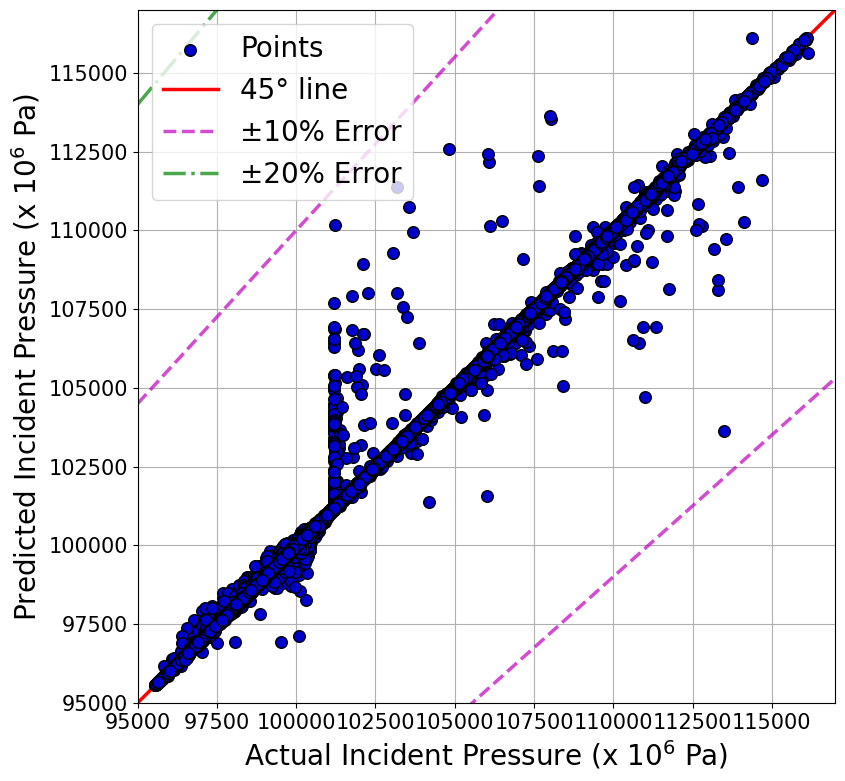

In [27]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Incident Pressure (x $10^6$ Pa)',fontsize = 20)
plt.xlabel('Actual Incident Pressure (x $10^6$ Pa)',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(95000,117000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(95000,117000)
plt.xlim(95000,117000)
plt.legend(loc='upper left',fontsize = 20)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [28]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 100.00%
Within 20% margin 100.00%
Out of 20% margin 0.00%


## <2000 kPa

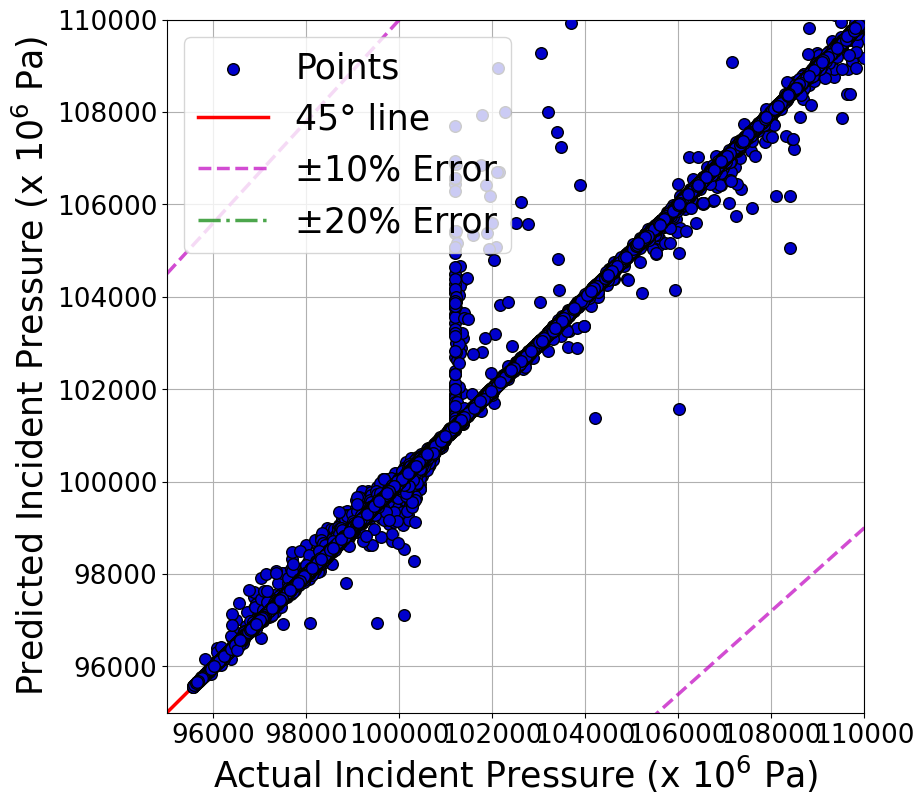

In [29]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Incident Pressure (x $10^6$ Pa)',fontsize = 25)
plt.xlabel('Actual Incident Pressure (x $10^6$ Pa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(95000,110000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(95000,110000)
plt.xlim(95000,110000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (300, 100),fontsize = 25)  #Model is called here

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

# 5 - Save Model

In [30]:
import pickle
filename = 'XGB_1.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [31]:
import pickle
pickle.dump(sc, open('scaler.pkl', 'wb'))

# 6 - Use model

## import libraries 

In [17]:
import pickle

## Load model

In [18]:
filename = 'XGB_14.sav'
regressor = pickle.load(open(filename, 'rb'))

## Import parameters

In [175]:
%store -r arrival_time
%store -r end_time
%store -r change_time
%store -r peak_time
%store -r peak_pressure
print (arrival_time, peak_time, change_time, end_time, peak_pressure)

[[0.01]] [[0.01]] [[0.01]] [[0.05]] [[203857.83]]


## Pressure stable sections

In [118]:
def stable_state(start, end, interval):    
    t = np.arange(start, end + interval, interval)
    t = t.reshape(len(t),1)
    print ("t", t.shape)

    p = np.repeat(atm_pressure, len(t)).reshape(len(t),1)
    print ("p", p.shape)
    
    values = np.concatenate ((t, p), axis = 1)
    return values

In [119]:
termination_time = 0.05
interval = 0.00001
atm_pressure = 101200

if termination_time < arrival_time:
    start = 0
    end = termination_time
    values1 = stable_state(start, end, interval)
    arrival_time = 0
    end_time = 0
else:
    start = 0
    end = arrival_time
    values1 = stable_state(start, end, interval)
    if termination_time < end_time:
        end_time = termination_time
    else:
        start = end_time
        end = termination_time
        values3 = stable_state(start, end, interval)

t (856, 1)
p (856, 1)
t (402, 1)
p (402, 1)


## Pressure fluctuation section 

In [120]:
t2= np.arange(arrival_time, end_time + interval, interval)
print (t2)
t2 = t2.reshape(len(t2),1)
print (t2)
print (t2.shape)

[0.00854269 0.00855269 0.00856269 ... 0.04598124 0.04599124 0.04600124]
[[0.00854269]
 [0.00855269]
 [0.00856269]
 ...
 [0.04598124]
 [0.04599124]
 [0.04600124]]
(3747, 1)


In [121]:
if t2[0] < change_time:
    ph2 = np.array([[0, 1]])
else:
    ph2 = np.array([[1, 0]])
    
positive = np.array([0, 1])
negative = np.array([1, 0])

for time in t2[1:]:
    if time < change_time:
        ph2=np.vstack((ph2,positive))
    else:
        ph2=np.vstack((ph2,negative))
        
print (ph2)
print (ph2.shape)

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]
(3747, 2)


In [122]:
charge_mass = 20
standoff_distance = 6.3

m2 = np.repeat(charge_mass, len(t2)).reshape(len(t2),1)
print (m2.shape)
print (m2)

d2 = np.repeat(standoff_distance, len(t2)).reshape(len(t2),1)
print (d2.shape)
print (d2)

(3747, 1)
[[20]
 [20]
 [20]
 ...
 [20]
 [20]
 [20]]
(3747, 1)
[[6.3]
 [6.3]
 [6.3]
 ...
 [6.3]
 [6.3]
 [6.3]]


In [123]:
d_set = np.concatenate ((m2, d2, t2, ph2), axis = 1)

In [124]:
print (d_set.shape)

(3747, 5)


In [125]:
d_set[:,0:3] = sc.transform(d_set[:,0:3])
print (d_set)

[[-0.04235601  1.01222507 -1.18389762  0.          1.        ]
 [-0.04235601  1.01222507 -1.18303686  0.          1.        ]
 [-0.04235601  1.01222507 -1.18217609  0.          1.        ]
 ...
 [-0.04235601  1.01222507  2.03880551  1.          0.        ]
 [-0.04235601  1.01222507  2.03966627  1.          0.        ]
 [-0.04235601  1.01222507  2.04052704  1.          0.        ]]


## Prediction

In [130]:
p2 = regressor.predict(d_set)
print (max(p2))
p2.shape
p2 = p2.reshape((-1, 1))
values2 = np.concatenate ((t2, p2), axis = 1)

195711.47


## Combine ML graph

In [134]:
if 'values2' in globals():
    ml_model = np.concatenate((values1, values2), axis=0)
    if 'values3' in globals():
        ml_model = np.concatenate((ml_model, values3), axis=0)
else:
    ml_model = values1

## Visualisation

In [152]:
X1 = ml_model[:,0]
y1 = ml_model[:,1]

In [140]:
lsdyna = pd.read_excel('6.3m.xlsx')
X2 = lsdyna['Time']
y2 = lsdyna['Pressure']

In [141]:
viper = pd.read_excel('Viper_6.3m.xlsx')
X3 = viper['Time']
y3 = viper['Pressure']

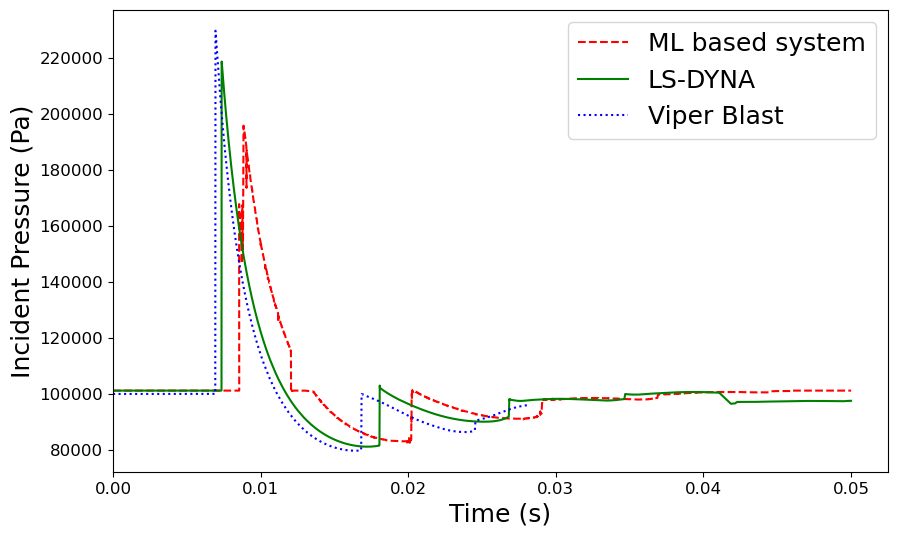

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(X1, y1, linestyle = 'dashed', color = 'red', label = 'ML based system')
plt.plot(X2, y2, color = 'green',label = 'LS-DYNA')
plt.plot(X3, y3, linestyle = 'dotted', color = 'blue',label = 'Viper Blast')
plt.ylabel('Incident Pressure (Pa)',fontsize = 18)
plt.xlabel('Time (s)',fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 18)
plt.xlim (0,)
plt.show()